## Final Assignment
Drew Phillips, Earth Data Analytics Bootcamp, Fall 2019

**Workflow for Part 1: Precipitation Data**

1. Download precipitation datasets for San Francisco and Boulder using custom function
2. Load datasets into numpy arrays
3. Select data for years 1989-2018 only using slicing
4. Find yearly max and monthly median precipitation values for both cities
5. Convert units in the resulting arrays to inches
6. Create lists of months (Jan - Dec) and years (1989-2018) for graphing
7. Plot results for both cities

*Data sources*
- [National Oceanic and Atmospheric Administration](https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html)
- [National Weather Service](https://w2.weather.gov/climate/xmacis.php?wfo=mtr)

**Workflow for Part 2: Flow/Dicharge Data**
1. Download precipitation datasets for 4 Colorado creeks
2. Load datasets into pandas dataframes
3. Select data for years 1990-2018 only using slicing
4. Resample to find yearly max
5. Select data for period: 2013-08-01 to 2013-10-31
6. Plot results for both cities

*Data source*
- [U.S. Geological Survey National Water Information System](https://waterdata.usgs.gov/nwis/inventory)

In [1]:
# Import packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
import pandas as pd
import earthpy as et
import hydrofunctions as hf

# Handle datetime conversions b/w matplotlib & pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# For Part 1
def download_to_numpy(download_url):
    """Download file from specified url
    and use specified filepath to 
    import file into numpy array.
    
    Parameters
    ----------
    download_url: string
        Text string for URL to csv file
        to be downloaded from web
        
    Returns
    -------
    arr: numpy array (object)
        Array created from downloaded
        csv file
    """
    
    arr = np.loadtxt(et.data.get_data(url=download_url),
                     delimiter=",")
    
    np.set_printoptions(suppress=True)
    
    return arr

In [3]:
# For Part 1
def array_stats_inches(arr, stat, ax):
    """Take in numpy array and calculate 
    specified statistic (median or maximum)
    along specified axis. Then convert
    values from mm to inches.

    Parameters
    ----------
    arr: numpy array (object)
        The numpy array containing precipitation
        values in mm. Used to find median or max 
        values, then converted to units
        in inches.

    stat: text string
        The type of statistic to calculate,
        median or maximum of all values.

    ax: integer
        The axis, 0 or 1, used to calculate
        the specified statistic. Enter 0 for 
        column-by-column (months), or enter 1
        for row-by-row (years).

    Returns
    ------
    arr_inches = int or float
        Array containing values of
        percipitation in inches.

    """

    if stat == "median" or stat == "med":
        calc_array = np.median(a=arr, axis=ax)

    elif stat == "maximum" or stat == "max":
        calc_array = np.max(a=arr, axis=ax)

    return calc_array * 0.03937

In [4]:
# For Part 2 of assignment
def hf_load_data(site, start, end):
    """Uses hydrofunctions library to 
    return pandas dataframe with flow
    data for specified site. Renames 
    columns to better describe data. 

    Parameters
    ----------
    site: text string
        String containing unique numeric 
        code for USGS stream gauge

    Returns
    -------
    df: pandas dataframe (object)
        Dataframe containing the 
        discharge values, indexed by 
        datetime
    """

    response = hf.get_nwis(site, 'dv', start, end)

    df = hf.extract_nwis_df(response.json())

    df.set_axis(['daily_mean_disch', 'flags'], axis=1, inplace=True)

    return df

### Part 1: Precipitation Data and Analysis

In [5]:
# Navigate to working directory
work_dir = os.path.join(et.io.HOME, "earth-analytics")

# Go to dir if dir exists
if os.path.exists(work_dir):

    os.chdir(work_dir)
    print(f"Changed path to {work_dir}")

else:
    print("Path does not exist.")

Changed path to C:\Users\dphil\earth-analytics


In [6]:
# Create list of URLs to download from
url_list = ["https://ndownloader.figshare.com/files/20026409",
            "https://ndownloader.figshare.com/files/20026412"]

# Create empty list to hold numpy arrays
arrays_list = []

# Loop through URLs in list and append 
# resulting arrays to other list
for url in url_list:
    array = download_to_numpy(download_url=url)
    arrays_list.append(array)

In [7]:
# Get arrays from list created in last step
boulder_precip_all = arrays_list[0]

sf_precip_all = arrays_list[1]

**Note on next 2 cells**

We want to select the years 1989 to 2018. There are 71 rows in the original data corresponding to each year from 1948 to 2018 (inclusive). 1989 is 41 years after 1948, so it is on row 42. Since python is zero indexed, we want row 41 since row 1 is indexed as row[0]. We would expect to see 30 rows (30 years from 1989 to 2018, inclusive).

In [8]:
# Get correct yearly range for Boulder, check shape
boulder_precip = boulder_precip_all[41:][:]

print(f"Boulder: {boulder_precip.shape}")

Boulder: (30, 12)


In [9]:
# Get correct yearly range for SF, check shape
sf_precip = sf_precip_all[41:][:]

print(f"San Francisco: {sf_precip.shape}")

San Francisco: (30, 12)


In [10]:
# Create list of precip datasets for each city
cities_precip_list = [boulder_precip, sf_precip]

# Create empty list to hold resulting stats arrays
stat_array_list = []

# Loop through precip datasets, calculate
# stats, and add results to above list
for precip_dataset in cities_precip_list:

    monthly_median = array_stats_inches(arr=precip_dataset,
                                        stat="median",
                                        ax=0)

    stat_array_list.append(monthly_median)

    yearly_max = array_stats_inches(arr=precip_dataset,
                                    stat="max",
                                    ax=1)

    stat_array_list.append(yearly_max)

In [11]:
# Get monthly median for Boulder
boulder_precip_monthly_median = stat_array_list[0]

# Get yearly max values for Boulder
boulder_precip_yearly_max = stat_array_list[1]

In [12]:
# Get monthly median for SF
sf_precip_monthly_median = stat_array_list[2]

# Get yearly max for SF
sf_precip_yearly_max = stat_array_list[3]

In [13]:
# Create list of month names for plotting
month_names = ["JAN", "FEB", "MAR", "APR", "MAY",
               "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Create array of years for labeling plot
years = np.arange(1989, 2019)

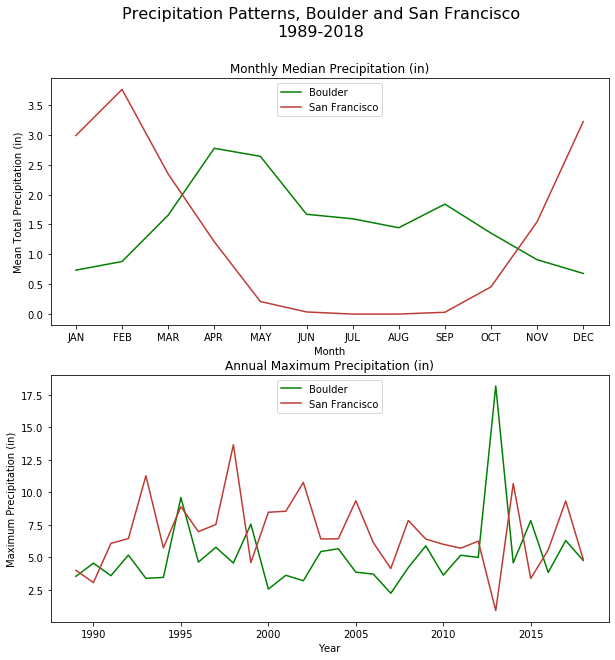

In [14]:
# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Create title for entire fig
fig.suptitle("Precipitation Patterns, Boulder and San Francisco" + 
              "\n1989-2018",
             fontsize=16)

"""Set up plot 1, monthly median precip values"""
# Create ax object for Boulder data
ax1.plot(month_names, boulder_precip_monthly_median,
         label="Boulder",
         color="#007f00")

# Create ax object for San Francisco data
ax1.plot(month_names, sf_precip_monthly_median,
         label="San Francisco",
         color="#BE3A34")

# Set appearance and labels
ax1.set(xlabel="Month",
        ylabel="Mean Total Precipitation (in)",
        title="Monthly Median Precipitation (in)")

# Locate legend in top center
ax1.legend(loc=9)

"""Set up plot 2, yearly max precip values"""
ax2.plot(years, boulder_precip_yearly_max,
         label="Boulder",
         color="#007f00")

ax2.plot(years, sf_precip_yearly_max,
         label="San Francisco",
         color="#BE3A34")

# Set appearance and labels
ax2.set(xlabel="Year",
        ylabel="Maximum Precipitation (in)",
        title="Annual Maximum Precipitation (in)")

# Locate legend in top center
ax2.legend(loc=9)

# Remove object info, just show plot
plt.show()

**Graph Dicsussion**

The pattern of monthly median precipitation is dissimilar between Boulder and San Francisco (SF). In SF, the wettest month in the time period (1989-2019) is Feb at 3.76 inches. Dec and Jan also display high precipitation values. However, in Boulder, Jan and Dec are the driest months (under 0.75 inches for either) and April is the wettest. The precipitation in SF reaches its lowest values in the summer months of May through Sep. The data suggest that more precipitation falls in SF during the winter, and more falls in Boulder during the spring (Apr - May).

Both Boulder and SF show peaks and valleys that do not reliably correspond with one another, though the values for SF are generally higher. The Boulder floods of 2013 are suggested in the plot; 2013 displays the greatest value of annual mean precipitation of either city in the specified time period. Interestingly, 2013 had the lowest annual max precipitation in SF in the time period. These data suggest that annual precipitation maxima in Boulder and SF are not directly correlated. Further analysis could reveal if there is any relationship between precipitation rates in the 2 cities. Perhaps "precipitation" could be limited to rain only, which may reveal patterns.

### Part 2: Discharge/Flow Data and Analysis

In [15]:
# Create variables that are constant in this analysis
start = '1990-1-1'
end = '2018-12-31'

# Create list of sites using unique USGS stream gauge
# identifiers
sites_list = ['06730500',
              '09105000',
              '07106300',
              '07126390']

In [16]:
# Create empty list to hold dataframes
df_list = []

# Loop thru sites and pass data to custom function
# Then add results to dataframes list (df_list)
for site in sites_list:

    df = hf_load_data(site, start, end)

    df_list.append(df)

In [17]:
# Assign names to dataframes in df_list
boulder_cr = df_list[0]
plateau_cr = df_list[1]
fountain_cr = df_list[2]
lock_canyon_cr = df_list[3]

In [18]:
# Slice df for Aug - Oct 2013 to get daily mean discharge
boulder_cr_daily = boulder_cr['2013-08-01':'2013-10-31']
plateau_cr_daily = plateau_cr['2013-08-01':'2013-10-31']
fountain_cr_daily = fountain_cr['2013-08-01':'2013-10-31']
lock_canyon_cr_daily = lock_canyon_cr['2013-08-01':'2013-10-31']

In [19]:
# Slice df to get data for analysis period
# Then resample to find annual max

boulder_annual_max = boulder_cr['1990-01-01':'2018-12-31']
boulder_annual_max = boulder_annual_max.resample('Y').max()

plateau_annual_max = plateau_cr['1990-01-01':'2018-12-31']
plateau_annual_max = plateau_annual_max.resample('Y').max()

fountain_annual_max = fountain_cr['1990-01-01':'2018-12-31']
fountain_annual_max = fountain_annual_max.resample('Y').max()

lock_canyon_annual_max = lock_canyon_cr['1990-01-01':'2018-12-31']
lock_canyon_annual_max = lock_canyon_annual_max.resample('Y').max()

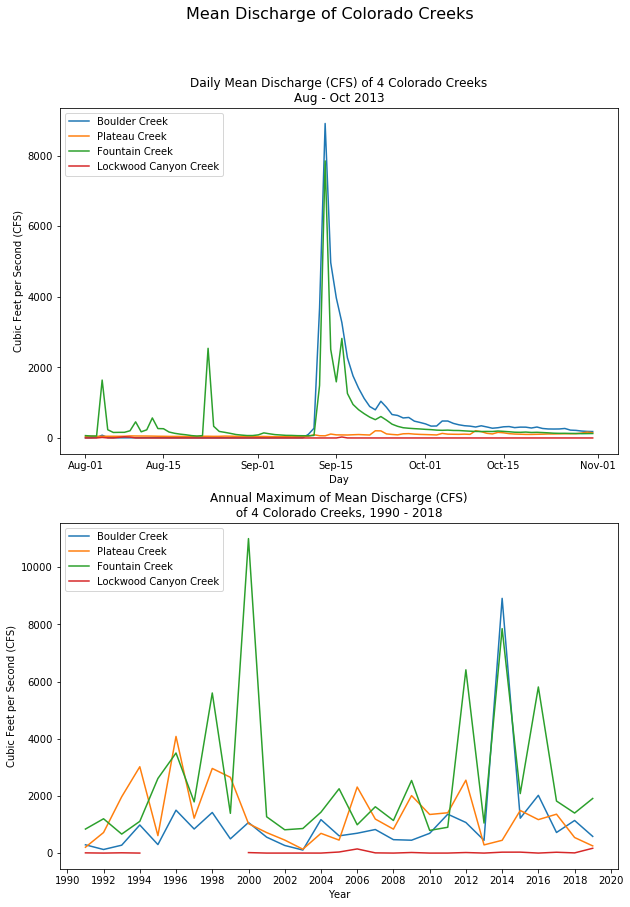

In [20]:
# Set up figure object that holds 2 plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# Set supertitle for entire figure
fig.suptitle("Mean Discharge of Colorado Creeks",
             fontsize=16)

"""For daily mean discharge from Aug - Oct 2013"""
# Set display params for axis 1
ax1.set(xlabel="Day",
        ylabel="Cubic Feet per Second (CFS)",
        title="Daily Mean Discharge (CFS) of 4 Colorado Creeks" +
              "\nAug - Oct 2013")

# Plot data for Boulder Cr.
ax1.plot(boulder_cr_daily.index.values,
         boulder_cr_daily.daily_mean_disch,
         label="Boulder Creek")

# Plot data for Plateau Cr.
ax1.plot(plateau_cr_daily.index.values,
         plateau_cr_daily.daily_mean_disch,
         label="Plateau Creek")

# Plot data for Fountain Cr.
ax1.plot(fountain_cr_daily.index.values,
         fountain_cr_daily.daily_mean_disch,
         label="Fountain Creek")

# Plot data for Lock Canyon Cr.
ax1.plot(lock_canyon_cr_daily.index.values,
         lock_canyon_cr_daily.daily_mean_disch,
         label="Lockwood Canyon Creek")

# Format x axis, labels like "Aug-01"
date_form = DateFormatter("%b-%d")

# Set format for x axis
ax1.xaxis.set_major_formatter(date_form)

# Add and locate legend
ax1.legend(loc=2)

"""For annual max of mean discharge"""
# Set display params for axis 2
ax2.set(xlabel="Year",
        ylabel="Cubic Feet per Second (CFS)",
        title="Annual Maximum of Mean Discharge (CFS)" +
               "\n of 4 Colorado Creeks, 1990 - 2018 ")

# Plot data for Boulder Cr.
ax2.plot(boulder_annual_max.index.values,
         boulder_annual_max.daily_mean_disch,
         label="Boulder Creek")

# Plot data for Plateau Cr.
ax2.plot(plateau_annual_max.index.values,
         plateau_annual_max.daily_mean_disch,
         label="Plateau Creek")

# Plot data for Fountain Cr.
ax2.plot(fountain_annual_max.index.values,
         fountain_annual_max.daily_mean_disch,
         label="Fountain Creek")

# Plot data for Lock Canyon Cr.
ax2.plot(lock_canyon_annual_max.index.values,
         lock_canyon_annual_max.daily_mean_disch,
         label="Lockwood Canyon Creek")

# Format x axis, labels like "2001"
date_form_2 = DateFormatter("%Y")

# Set format for x axis
ax2.xaxis.set_major_formatter(date_form_2)

# Show tics every 2 years
ax2.xaxis.set_major_locator(mdates.YearLocator(2))

# Add and locate legend
ax2.legend(loc=2)

# Show plot without weird memory location text
plt.show()

**Graph Discussion**

The plot for daily mean discharge shows major spikes on Sep 13 for Boulder Creek (8910 CFS) and Fountain Creek (7850 CFS). These values are greatly increased from the next highest daily mean values. Fountain Creek was somewhat unique in that it showed spiking flow values on 8-23-2013 and 9-24-2013, when the 3 other creeks did not show elevated flow values. It would be interesting to explore if these elevated values were related to weather that influenced the major flooding events.

Boulder and Fountain creeks are located in Boulder County and Pueblo/El Paso Counties, respectively, for which disaster emergencies were declared during the 2013 floods. Plateau Creek and Lock Canyon Creek did not show elevated flow values in the time period. Plateau Creek is located in Mesa County, to the west of the Rocky Mountains and (presumably) beyond the influence of the weather pattern that led to the 2013 floods. Lockwood Canyon Creek, located in Las Animas County, was likewise unaffected.

The plot of annual max of daily mean discharge data shows significant variation. Boulder Creek expereinced its maximum flow in 2013. Fountain Creek's annual maximum was in 1999 with 11000 CFS, and its second highest flow rate was in 2013 at 7850 CFS. The other two creeks did not reach their max daily mean discharge values in 2013. Fountain Creek seems to show major variation in its maximums, with its top 5 recorded flow rates peaking in 1999, 2013, 2011, 2015, and 1997. Flow data are missing for Lockwood Canyon Creek from 1994 - 1998 but given past values it is unlikely that there were major changes in this time period. The highest flow rate for Lockwood Canyon Creek was 168 CFS in 2018 (and the standard deviation for flow rates was only about 43 CFS from 1990 - 2018). Plateau Creek had elevated yearly max flow values in 1995, 1993, 1997, 1998, and 2011. The highest value for the aforementioned years was 1995, with a maximum of 4080 CFS.

**The following cells are used to caculate values in the discussion above**

In [21]:
fountain_cr_daily.sort_values(by='daily_mean_disch',
                              ascending=False).head(5)

,daily_mean_disch,flags
datetime,,
2013-09-13,7850.0,A
2013-09-16,2820.0,A
2013-08-23,2540.0,A
2013-09-14,2510.0,A
2013-08-04,1640.0,A


In [22]:
round(lock_canyon_annual_max.daily_mean_disch.std(), 2)

43.28